In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_1 = pd.read_csv("./data/cleaned/df_merged.csv")

### Have a General View of the relationship between Genres and MBTI types

In [2]:
df_mbti_genre = df_1.copy()

# Since a movie can belong to multiple genres, we need to split the genre field and then explode it
df_mbti_genre['genre'] = df_mbti_genre['genre'].str.split(', ')

# Exploding the dataframe on the 'genre' column
df_mbti_genre = df_mbti_genre.explode('genre')

# Counting the number of each MBTI type across all movies, grouped by genre
mbti_count_by_genre = df_mbti_genre.groupby(['genre', 'mbti']).size().reset_index(name='count')

# Group by 'genre' and filter based on the sum of 'count'
mbti_count_by_genre = mbti_count_by_genre.groupby('genre').filter(lambda x: x['count'].sum() >= 100)

mbti_count_by_genre["total_count_each_genre"] = mbti_count_by_genre.groupby("genre")["count"].transform('sum')
mbti_count_by_genre["mbti_by_genre_proportion"] = mbti_count_by_genre["count"] / mbti_count_by_genre["total_count_each_genre"] * 100

mbti_count_by_genre["total_count_each_mbti"] = mbti_count_by_genre.groupby("mbti")["mbti_by_genre_proportion"].transform('sum')
mbti_count_by_genre["genre_by_mbti_proportion"] = mbti_count_by_genre["mbti_by_genre_proportion"] / mbti_count_by_genre["total_count_each_mbti"] * 100

In [3]:
mbti_count_by_genre.sample(10)

,genre,mbti,count,total_count_each_genre,mbti_by_genre_proportion,total_count_each_mbti,genre_by_mbti_proportion
150,Fantasy,ESTP,26,315,8.253968,121.417430,6.798009
4,Action,ESFJ,54,1124,4.804270,63.093498,7.614525
192,Horror,INTJ,16,285,5.614035,69.982906,8.022009
16,Adventure,ENFJ,43,1048,4.103053,60.240179,6.811157
313,Thriller,ENFJ,12,199,6.030151,60.240179,10.010181
244,Mystery,ISTP,19,187,10.160428,102.121253,9.949376
190,Horror,INFJ,26,285,9.122807,70.961766,12.855947
197,Horror,ISTP,12,285,4.210526,102.121253,4.123066
12,Action,ISFJ,83,1124,7.384342,107.487900,6.869928
17,Adventure,ENFP,45,1048,4.293893,78.117112,5.496738


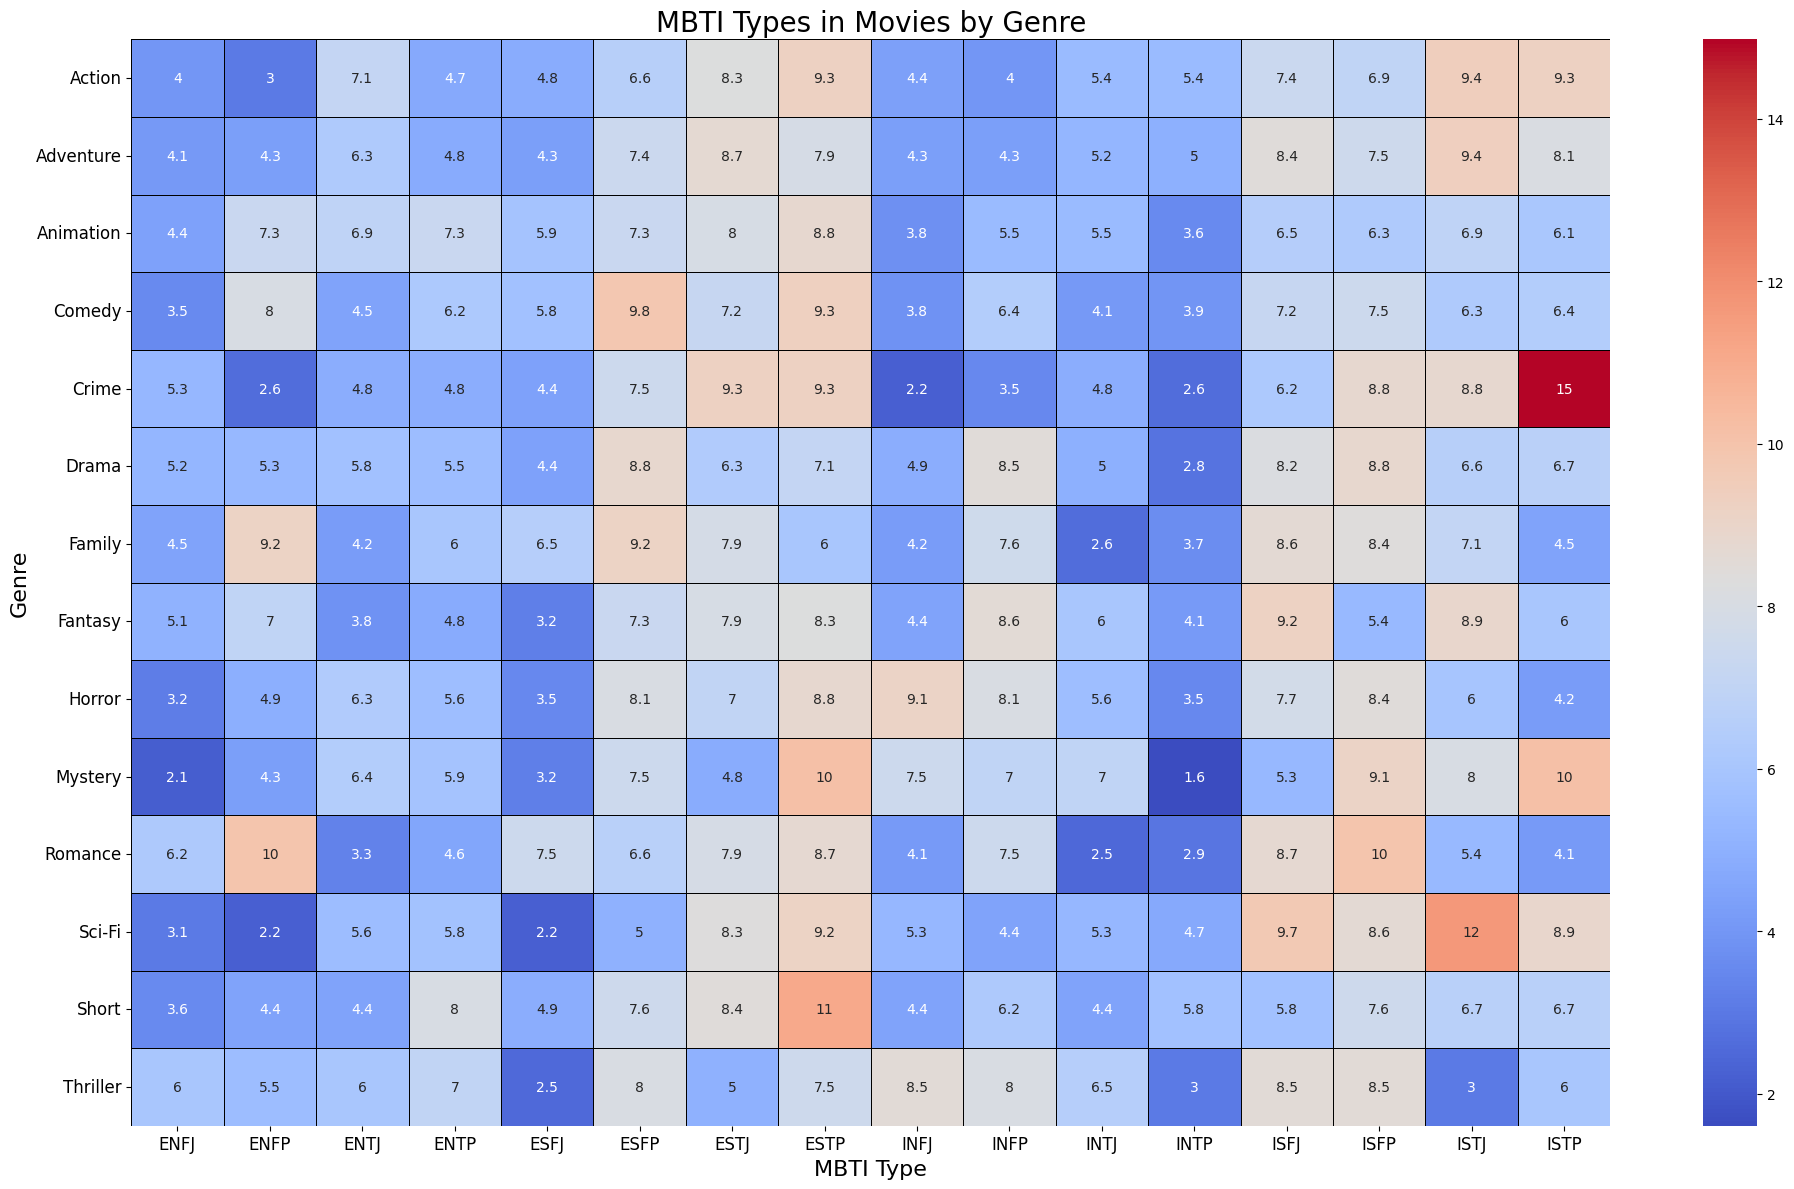

In [4]:
# Creating a pivot table for better plotting
pivot_table = mbti_count_by_genre.pivot_table(index='genre', columns='mbti', values='mbti_by_genre_proportion', fill_value=0)

# Convert counts to integers for better formatting in the heatmap
pivot_table = pivot_table.astype(float)

# Your existing code for creating the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", linewidths=.5, linecolor='black')
plt.title('MBTI Types in Movies by Genre', fontsize=20)
plt.ylabel('Genre', fontsize=16)
plt.xlabel('MBTI Type', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()

# Save the figure with high resolution
plt.savefig("./images/mbti_genre.png", dpi=300)  # Increase the dpi for better quality

# Show the plot
plt.show()


<Figure size 1800x700 with 0 Axes>

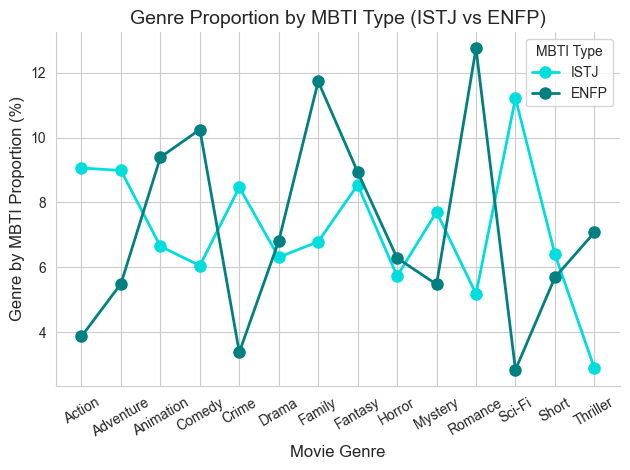

In [5]:
# Filtering for ISTJ and ENFP
filtered_df = mbti_count_by_genre[mbti_count_by_genre['mbti'].isin(['ISTJ', 'ENFP'])]

# Pivoting the DataFrame and reordering columns for correct legend
pivot_df = filtered_df.pivot(index='genre', columns='mbti', values='genre_by_mbti_proportion')
pivot_df = pivot_df[['ISTJ', 'ENFP']]  # Ensuring ISTJ is first and ENFP is second

# Adjusting the plot to make it wider
plt.figure(figsize=(18, 7))  # Increased width
sns.set_style("whitegrid")

# Line plot with wider plot size
ax = pivot_df.plot(kind='line', marker='o', color=['#00DDDD', '#008080'], linewidth=2, markersize=8)

# Customizing the plot with wider size
plt.xlabel('Movie Genre', fontsize=12)
plt.ylabel('Genre by MBTI Proportion (%)', fontsize=12)
plt.title('Genre Proportion by MBTI Type (ISTJ vs ENFP)', fontsize=14)
plt.xticks(rotation=30, ticks=range(len(pivot_df.index)), labels=pivot_df.index)
plt.yticks(fontsize=10)
ax.legend(['ISTJ', 'ENFP'], title='MBTI Type', fontsize=10)
sns.despine()

# Showing the plot with the corrected legend
plt.tight_layout()

# Save the figure with high resolution
plt.savefig("./images/ISTJ-ENFP_genre.png", dpi=300)  # Increase the dpi for better quality

plt.show()